In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
import matplotlib

#sns.set_style()
#sns.set_theme()

font = {"family": "sans-serif", "weight": "normal", "size": 13}

matplotlib.rc("font", **font)

In [12]:
deltas = [
    ("MoCo - EuroSAT", 0.9385 - 0.8283),
    ("MoCo - TreeSatAI (MSI)", 0.37887 - 0.29857),
    ("MoCo - TreeSatAI (RGB)", 0.28826 - 0.20400),
    ("MoCo - SAT-6", 0.9990 - 0.9817),
    ("ImageNet - EuroSAT", 0.6293 - 0.6467),
    ("ImageNet - TreeSatAI (MSI)", 0.28370 - 0.21947),
    ("ImageNet - TreeSatAI (RGB)", 0.20817 - 0.16911),
    ("ImageNet - SAT-6", 0.9977 - 0.9817),
    ("Random init. - EuroSAT", 0.8237 - 0.6743),
    ("Random init. - TreeSatAI (MSI)", 0.32990 - 0.24683),
    ("Random init. - TreeSatAI (RGB)", 0.2292 - 0.1866),
    ("Random init. - SAT-6", 0.9857 - 0.9207),
    ("MOSAIKS - EuroSAT", 0.8333 - 0.8339),
    ("MOSAIKS - TreeSatAI (MSI)", 0.34298 - 0.34516),
    ("MOSAIKS - TreeSatAI (RGB)", 0.1951 - 0.2117),
    ("MOSAIKS - SAT-6", 0.9846 - 0.9862),
]
methods = [d[0] for d in deltas]
deltas = [d[1] * 100 for d in deltas]
data = dict(method=methods, delta=deltas)
df = pd.DataFrame(data)
df = df.sort_values("delta", ascending=True).reset_index()
df

,index,method,delta
0,4,ImageNet - EuroSAT,-1.740
1,14,MOSAIKS - TreeSatAI (RGB),-1.660
2,13,MOSAIKS - TreeSatAI (MSI),-0.218
3,15,MOSAIKS - SAT-6,-0.160
4,12,MOSAIKS - EuroSAT,-0.060
5,7,ImageNet - SAT-6,1.600
6,3,MoCo - SAT-6,1.730
7,6,ImageNet - TreeSatAI (RGB),3.906
8,10,Random init. - TreeSatAI (RGB),4.260
9,5,ImageNet - TreeSatAI (MSI),6.423


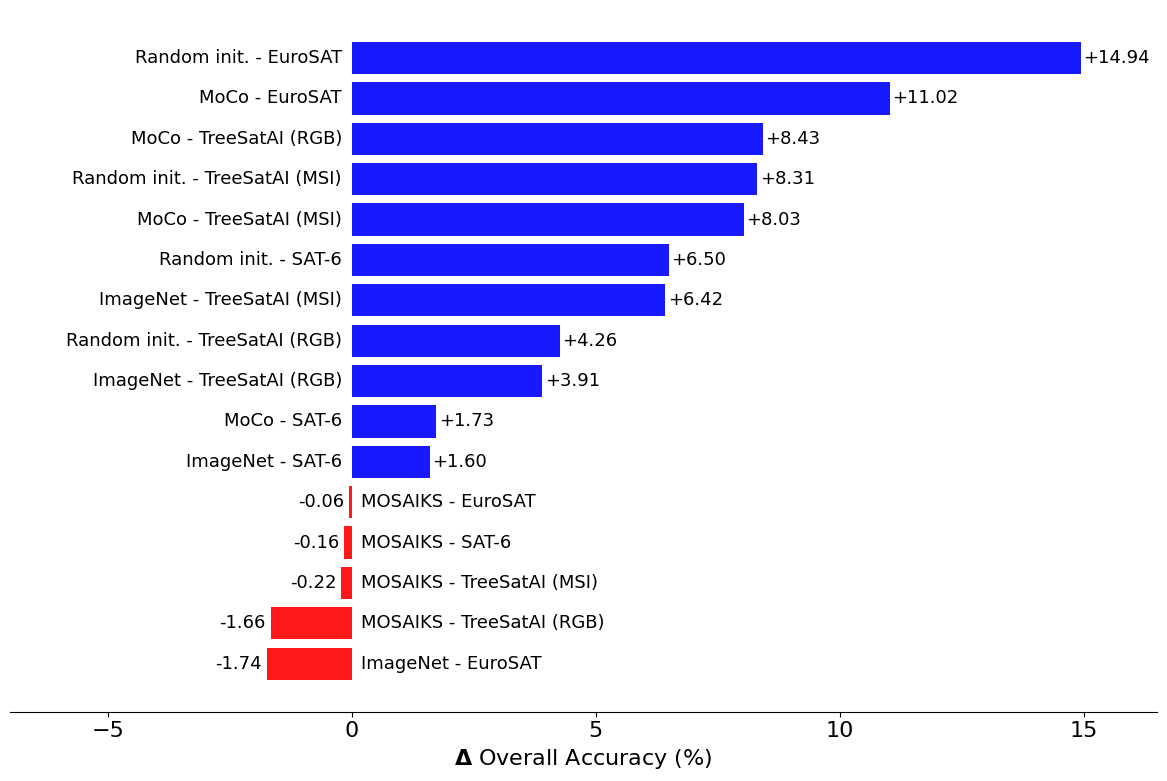

In [14]:
colors = ["blue" if x >= 0 else "red" for x in df["delta"]]
plt.figure(figsize=(12, 8))
ax = plt.barh(
    y=np.arange(len(df)),
    width=df.delta,
    color=colors,
    alpha=0.9,
    #edgecolor="k",
    linewidth=1,
)
plt.xlim([-7, 16.5])
plt.xticks([-5, 0, 5, 10, 15], fontsize=16)
plt.yticks([],[])
plt.xlabel(r"$\Delta$ Overall Accuracy (%)", fontsize=16)
for rect, method, delta in zip(ax.patches, df["method"], df["delta"]):
    height = rect.get_y() + rect.get_height() / 2
    width = rect.get_width()
    delta_str = (
        r"+{:.2f}".format(np.abs(delta))
        if delta >= 0
        else r"-{:.2f}".format(np.abs(delta))
    )
    delta_x = width + 0.05 if delta >= 0 else width - 0.1
    color = "black" if delta >= 0 else "black"
    ha = "left" if delta >= 0 else "right"
    plt.text(delta_x, height, delta_str, ha=ha, va="center", color=color)
    ha = "right" if delta >= 0 else "left"
    method_x = 0.2 if delta < 0 else -0.2
    method_height = rect.get_y() + rect.get_height() / 2
    plt.text(method_x, height, method, ha=ha, va="center")
ax = plt.gca()
ax.spines[["left", "right", "top"]].set_visible(False)
ax.yaxis.set_tick_params(labelleft=False)
plt.tight_layout()